# Test BB fit methods
Comment 31/01/26: The purpose of this notebook is to use extrabol to fit a Planck function to the light curves.<br>
The features extracted are:
- BB temperature + corresponding error
- BB radius + corresponding error
- BB bolometric luminosity + corresponding error
- Colors based on extrabol GP fit<br>


For select phases relative to time of peak flux. <br>
NOTE: A few training TDEs did not get successfully processed by extrabol as it is set up in this notebook. I instead processed these directly in the terminal with a SNR limit of 4 rather than 3.

In [115]:
# Initialization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import extrabol
import os
import time
import warnings 
warnings.filterwarnings('ignore')

%matplotlib ipympl

#Defining a function to convert from AB magnitude to flux in microjanskys
def ab_to_uJy (magAB):
    flux_Jy = 10**(23 - (magAB + 48.6)/2.5)
    flux_mJy = flux_Jy*1000000
    return flux_mJy

#Defining a function to convert from flux in microjanskys to AB magnitude
def uJy_to_ab (mJy):
    flux_Jy = mJy/1000000
    ab = 2.5*(23 - np.log10(flux_Jy))-48.6
    return ab

In [2]:
# Filter dict
lsst={'u':'LSST/LSST.u','g':'LSST/LSST.g','r':'LSST/LSST.r','i':'LSST/LSST.i','z':'LSST/LSST.z','y':'LSST/LSST.y'}

In [142]:
# Make directory for extrabol files
if not os.path.exists('extrabol/training'):
    os.makedirs('extrabol/training')
if not os.path.exists('extrabol/test'):
    os.makedirs('extrabol/test')

In [143]:
# Load log
#df_log=pd.read_csv('content/mallorn-astronomical-classification-challenge/train_log.csv')
df_log=pd.read_csv('content/mallorn-astronomical-classification-challenge/test_log.csv')

df_log=df_log#[3000:3020]

## Prepare input files for extrabol

In [144]:
for obj_id in df_log['object_id']:
    #spectype=df_log.SpecType[df_log.object_id==obj_id].values[0]
    #spectype=spectype.replace(" ","_")
    #fname=f"extrabol/training/{obj_id}_{spectype}.dat"
    fname=f"extrabol/test/{obj_id}.dat"
    with open(fname,'w') as f:
        # Keep only relevant row
        df_mask=df_log[df_log.object_id==obj_id]
    
        # light curve DF
        #df=pd.read_csv('content/mallorn-astronomical-classification-challenge/{}/train_full_lightcurves.csv'.format(df_mask.split.values[0]))
        df=pd.read_csv('content/mallorn-astronomical-classification-challenge/{}/test_full_lightcurves.csv'.format(df_mask.split.values[0]))

        # choose only relevant data
        df=df[df.object_id==obj_id]
        # filter out negative flux values and low SNR
        flux_mask=(df.Flux>0)&(df.Flux/df.Flux_err>3)
        df_mag=df[flux_mask]
        df_mag['mag']=uJy_to_ab(df_mag.Flux)
        df_mag['mag_err']=1.09*df_mag.Flux_err/df_mag.Flux
        df_mag['mag_sys']='AB'
        df_mag['Filter']=df_mag['Filter'].replace(lsst)
        df_mag=df_mag.dropna()
        f.write(f"{float(df_mask.Z.values[0])}\n")
        f.write(f"{float(df_mask.EBV.values[0])}\n")
        for _, row in df_mag.iterrows():
            f.write(f"{row['Time (MJD)']} {row['mag']} {row['mag_err']} {row['Filter']} {row['mag_sys']}\n")
    
                   
    

## Run extrabol

In [166]:
#df_log=pd.read_csv('content/mallorn-astronomical-classification-challenge/test_log.csv')
df_log=pd.read_csv('content/mallorn-astronomical-classification-challenge/train_log.csv')
#df_log=df_log[3500:]

import concurrent.futures
import subprocess

def run_extrabol(row):
    obj_id = row['object_id']
    spectype = row['SpecType'].replace(" ", "_")
    fname = f"extrabol/training/{obj_id}_{spectype}.dat"
    #fname = f"extrabol/test/{obj_id}.dat"
    subprocess.run(["extrabol", fname, "-snr", "3","-s","-300","-e","300", "--outdir", "extrabol/output_files_training"])

with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
    executor.map(run_extrabol, df_log.to_dict('records'))



All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!


python3.13/site-packages/george/gp.py", line 331, in compute
    self.solver.compute(self._x, yerr, **kwargs)
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/solvers/basic.py", line 68, in compute
    self._factor = (cholesky(K, overwrite_a=True, lower=False), False)
                    ~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/linalg/_decomp_cholesky.py", line 101, in cholesky
    c, lower = _cholesky(a, lower=lower, overwrite_a=overwrite_a, clean=True,
               ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                         check_finite=check_finite)
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/linalg/_decomp_cholesky.py", line 18, in _cholesky
    a1 = asarray_chkfinite(a) if check_finite else asarray(a)
         ~~~~~~~~~~~~~~~~~^^^
  File "/opt/anaconda3/lib/python3.13/s

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!


mwrapped
    fx = fun(np.copy(x), *args)
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 646, in neg_ln_like
    return -gp.log_likelihood(fluxes)
            ~~~~~~~~~~~~~~~~~^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/gp.py", line 385, in log_likelihood
    if not self.recompute(quiet=quiet):
           ~~~~~~~~~~~~~~^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/gp.py", line 355, in recompute
    self.compute(self._x, np.sqrt(self._yerr2), **kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/gp.py", line 331, in compute
    self.solver.compute(self._x, yerr, **kwargs)
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/solvers/basic.py", line 68, in compute
    self._factor = (cholesky(K, overwrite_a=True, lower=False), False)
                    ~~~~~~~~^^^^^^^^^^^^^^^^^^^^

All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)
/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!


mwrapped
    fx = fun(np.copy(x), *args)
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 646, in neg_ln_like
    return -gp.log_likelihood(fluxes)
            ~~~~~~~~~~~~~~~~~^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/gp.py", line 385, in log_likelihood
    if not self.recompute(quiet=quiet):
           ~~~~~~~~~~~~~~^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/gp.py", line 355, in recompute
    self.compute(self._x, np.sqrt(self._yerr2), **kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/gp.py", line 331, in compute
    self.solver.compute(self._x, yerr, **kwargs)
    ~~~~~

All done!
All done!


~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/solvers/basic.py", line 68, in compute
    self._factor = (cholesky(K, overwrite_a=True, lower=False), False)
                    ~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/linalg/_decomp_cholesky.py", line 101, in cholesky
    c, lower = _cholesky(a, lower=lower, overwrite_a=overwrite_a, clean=True,
               ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                         check_finite=check_finite)
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/linalg/_decomp_cholesky.py", line 18, in _cholesky
    a1 = asarray_chkfinite(a) if check_finite else asarray(a)
         ~~~~~~~~~~~~~~~~~^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py", line 665, in asarray_chkfinite
    raise ValueError(
        "array mus

All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:53: RuntimeWarning: overflow encountered in exp
  blam = ((2.*np.pi*h*c**2) / (lam_cm**5)) / (np.exp(exponential)-1.)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!


onda3/lib/python3.13/site-packages/scipy/linalg/_decomp_cholesky.py", line 18, in _cholesky
    a1 = asarray_chkfinite(a) if check_finite else asarray(a)
         ~~~~~~~~~~~~~~~~~^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py", line 665, in asarray_chkfinite
    raise ValueError(
        "array must not contain infs or NaNs")
ValueError: array must not contain infs or NaNs


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
ython3.13/site-packages/scipy/optimiz

All done!


mwrapped
    fx = fun(np.copy(x), *args)
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 646, in neg_ln_like
    return -gp.log_likelihood(fluxes)
            ~~~~~~~~~~~~~~~~~^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/gp.py", line 385, in log_likelihood
    if not self.recompute(quiet=quiet):
           ~~~~~~~~~~~~~~^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/gp.py", line 355, in recompute
    self.compute(self._x, np.sqrt(self._yerr2), **kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/gp.py", line 331, in compute
    self.solver.compute(self._x, yerr, **kwargs)
    ~~~~~

All done!
All done!
All done!
All done!
All done!


~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/solvers/basic.py", line 68, in compute
    self._factor = (cholesky(K, overwrite_a=True, lower=False), False)
                    ~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/linalg/_decomp_cholesky.py", line 101, in cholesky
    c, lower = _cholesky(a, lower=lower, overwrite_a=overwrite_a, clean=True,
               ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                         check_finite=check_finite)
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/linalg/_decomp_cholesky.py", line 18, in _cholesky
    a1 = asarray_chkfinite(a) if check_finite else asarray(a)
         ~~~~~~~~~~~~~~~~~^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py", line 665, in asarray_chkfinite
    raise ValueError(
        "array mus

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
ython3.13/site-packages/scipy/optimiz

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/george/kernels.py:94: RuntimeWarning: divide by zero encountered in log
  log_constant = np.log(float(b)/self.ndim)
/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_minpack_py.py:982: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1165, in main
    Tarr, Rarr, Terr_arr, Rerr_arr, covar_arr = fit_bb(dense_lc, wvs, args.mc,
                                                ~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^
                                                       args.T_max)
                                                       ^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 762, in fit_bb
    BBparams, covar = curve_fit(bbody, wvs, flam, maxfev=10000,
   

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/p

All done!
All done!


ython3.13/site-packages/scipy/optimize/_minimize.py", line 738, in minimize
    res = _minimize_lbfgsb(fun, x0, args, jac, bounds,
                           callback=callback, **options)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_lbfgsb_py.py", line 441, in _minimize_lbfgsb
    f, g = func_and_grad(x)
           ~~~~~~~~~~~~~^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 344, in fun_and_grad
    self._update_fun()
    ~~~~~~~~~~~~~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 295, in _update_fun
    fx = self._wrapped_fun(self.x)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 21, in wrapped
    fx = fun(np.copy(x), *args)
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 646, in neg_ln_like
    return -gp.log_likelihood(fluxes)
            ~~~~~~~~~~~~~~~

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/george/kernels.py:94: RuntimeWarning: divide by zero encountered in log
  log_constant = np.log(float(b)/self.ndim)
/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_minpack_py.py:982: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1165, in main
    Tarr, Rarr, Terr_arr, Rerr_arr, covar_arr = fit_bb(dense_lc, wvs, args.mc,
                                                ~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^
                                                       args.T_max)
                                                       ^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 762, in fit_bb
    BBparams, covar = curve_fit(bbody, wvs, flam, maxfev=10000,
   

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!


/opt/anaconda3/lib/python3.13/site-packages/george/kernels.py:94: RuntimeWarning: divide by zero encountered in log
  log_constant = np.log(float(b)/self.ndim)
/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_minpack_py.py:982: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1165, in main
    Tarr, Rarr, Terr_arr, Rerr_arr, covar_arr = fit_bb(dense_lc, wvs, args.mc,
                                                ~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^
                                                       args.T_max)
                                                       ^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 762, in fit_bb
    BBparams, covar = curve_fit(bbody, wvs, flam, maxfev=10000,
   

All done!
All done!


 jac=jac, bounds=bounds, method=method,
                        **kwargs)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_lsq/least_squares.py", line 845, in least_squares
    raise ValueError("Residuals are not finite in the initial point.")
ValueError: Residuals are not finite in the initial point.


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/george/kernels.py:94: RuntimeWarning: divide by zero encountered in log
  log_constant = np.log(float(b)/self.ndim)
/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_minpack_py.py:982: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1165, in main
    Tarr, Rarr, Terr_arr, Rerr_arr, covar_arr = fit_bb(dense_lc, wvs, args.mc,
                                                ~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^
                                                       args.T_max)
                                                       ^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 762, in fit_bb
    BBparams, covar = curve_fit(bbody, wvs, flam, maxfev=10000,
   

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)
/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)
/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!


/opt/anaconda3/lib/python3.13/site-packages/george/kernels.py:94: RuntimeWarning: divide by zero encountered in log
  log_constant = np.log(float(b)/self.ndim)
/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_minpack_py.py:982: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1165, in main
    Tarr, Rarr, Terr_arr, Rerr_arr, covar_arr = fit_bb(dense_lc, wvs, args.mc,
                                                ~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^
                                                       args.T_max)
                                                       ^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 762, in fit_bb
    BBparams, covar = curve_fit(bbody, wvs, flam, maxfev=10000,
   

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_lik

All done!


e,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_minimize.py", line 738, in minimize
    res = _minimize_lbfgsb(fun, x0, args, jac, bounds,
                           callback=callback, **options)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_lbfgsb_py.py", line 441, in _minimize_lbfgsb
    f, g = func_and_grad(x)
           ~~~~~~~~~~~~~^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 344, in fun_and_grad
    self._update_fun()
    ~~~~~~~~~~~~~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 295, in _update_fun
    fx = self._wrapped_fun(self.x)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 21, in wrapped
    fx = fun(np.copy(x), *args)
  Fi

All done!
All done!
All done!


python3.13/site-packages/george/gp.py", line 331, in compute
    self.solver.compute(self._x, yerr, **kwargs)
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/solvers/basic.py", line 68, in compute
    self._factor = (cholesky(K, overwrite_a=True, lower=False), False)
                    ~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/linalg/_decomp_cholesky.py", line 101, in cholesky
    c, lower = _cholesky(a, lower=lower, overwrite_a=overwrite_a, clean=True,
               ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                         check_finite=check_finite)
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^
onda3/lib/python3.13/site-packages/scipy/linalg/_decomp_cholesky.py", line 18, in _cholesky
    a1 = asarray_chkfinite(a) if check_finite else asarray(a)
         ~~~~~~~~~~~~~~~~~^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/nump

All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/p

All done!


ython3.13/site-packages/scipy/optimize/_minimize.py", line 738, in minimize
    res = _minimize_lbfgsb(fun, x0, args, jac, bounds,
                           callback=callback, **options)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_lbfgsb_py.py", line 441, in _minimize_lbfgsb
    f, g = func_and_grad(x)
           ~~~~~~~~~~~~~^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 344, in fun_and_grad
    self._update_fun()
    ~~~~~~~~~~~~~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 295, in _update_fun
    fx = self._wrapped_fun(self.x)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 21, in wrapped
    fx = fun(np.copy(x), *args)
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 646, in neg_ln_like
    return -gp.log_likelihood(fluxes)
            ~~~~~~~~~~~~~~~

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/george/kernels.py:94: RuntimeWarning: divide by zero encountered in log
  log_constant = np.log(float(b)/self.ndim)
/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_minpack_py.py:982: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1165, in main
    Tarr, Rarr, Terr_arr, Rerr_arr, covar_arr = fit_bb(dense_lc, wvs, args.mc,
                                                ~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^
                                                       args.T_max)
                                                       ^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 762, in fit_bb
    BBparams, covar = curve_fit(bbody, wvs, flam, maxfev=10000,
   

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/george/kernels.py:94: RuntimeWarning: divide by zero encountered in log
  log_constant = np.log(float(b)/self.ndim)
/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_minpack_py.py:982: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1165, in main
    Tarr, Rarr, Terr_arr, Rerr_arr, covar_arr = fit_bb(dense_lc, wvs, args.mc,
                                                ~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^
                                                       args.T_max)
                                                       ^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 762, in fit_bb
    BBparams, covar = curve_fit(bbody, wvs, flam, maxfev=10000,
   

All done!
All done!
All done!


1;31mp0=prior_fit, sigma=flam_err,
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                                bounds=(0, [T_max, np.inf]),
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                                method = 'dogbox',
                                ^^^^^^^^^^^^^^^^^^
                                absolute_sigma=True)
                                ^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_minpack_py.py", line 1025, in curve_fit
    res = least_squares(func, p0, jac=jac, bounds=bounds, method=method,
                        **kwargs)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_lsq/least_squares.py", line 845, in least_squares
    raise ValueError("Residuals are not finite in the initial point.")
ValueError: Residuals are not finite in the initial point.


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/george/kernels.py:94: RuntimeWarning: divide by zero encountered in log
  log_constant = np.log(float(b)/self.ndim)
/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_minpack_py.py:982: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1165, in main
    Tarr, Rarr, Terr_arr, Rerr_arr, covar_arr = fit_bb(dense_lc, wvs, args.mc,
                                                ~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^
                                                       args.T_max)
                                                       ^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 762, in fit_bb
    BBparams, covar = curve_fit(bbody, wvs, flam, maxfev=10000,
   

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_lik

All done!


e,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_minimize.py", line 738, in minimize
    res = _minimize_lbfgsb(fun, x0, args, jac, bounds,
                           callback=callback, **options)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_lbfgsb_py.py", line 441, in _minimize_lbfgsb
    f, g = func_and_grad(x)
           ~~~~~~~~~~~~~^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 344, in fun_and_grad
    self._update_fun()
    ~~~~~~~~~~~~~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 295, in _update_fun
    fx = self._wrapped_fun(self.x)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 21, in wrapped
    fx = fun(np.copy(x), *args)
  Fi

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/george/kernels.py:94: RuntimeWarning: divide by zero encountered in log
  log_constant = np.log(float(b)/self.ndim)
/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_minpack_py.py:982: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1165, in main
    Tarr, Rarr, Terr_arr, Rerr_arr, covar_arr = fit_bb(dense_lc, wvs, args.mc,
                                                ~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^
                                                       args.T_max)
                                                       ^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 762, in fit_bb
    BBparams, covar = curve_fit(bbody, wvs, flam, maxfev=10000,
   

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:53: RuntimeWarning: overflow encountered in exp
  blam = ((2.*np.pi*h*c**2) / (lam_cm**5)) / (np.exp(exponential)-1.)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/george/kernels.py:94: RuntimeWarning: divide by zero encountered in log
  log_constant = np.log(float(b)/self.ndim)
/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_minpack_py.py:982: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1165, in main
    Tarr, Rarr, Terr_arr, Rerr_arr, covar_arr = fit_bb(dense_lc, wvs, args.mc,
                                                ~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^
                                                       args.T_max)
                                                       ^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 762, in fit_bb
    BBparams, covar = curve_fit(bbody, wvs, flam, maxfev=10000,
   

All done!
All done!


 jac=jac, bounds=bounds, method=method,
                        **kwargs)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_lsq/least_squares.py", line 845, in least_squares
    raise ValueError("Residuals are not finite in the initial point.")
ValueError: Residuals are not finite in the initial point.


All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/george/kernels.py:94: RuntimeWarning: divide by zero encountered in log
  log_constant = np.log(float(b)/self.ndim)
/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_minpack_py.py:982: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1165, in main
    Tarr, Rarr, Terr_arr, Rerr_arr, covar_arr = fit_bb(dense_lc, wvs, args.mc,
                                                ~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^
                                                       args.T_max)
                                                       ^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 762, in fit_bb
    BBparams, covar = curve_fit(bbody, wvs, flam, maxfev=10000,
   

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!


python3.13/site-packages/george/gp.py", line 331, in compute
    self.solver.compute(self._x, yerr, **kwargs)
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/solvers/basic.py", line 68, in compute
    self._factor = (cholesky(K, overwrite_a=True, lower=False), False)
                    ~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/linalg/_decomp_cholesky.py", line 101, in cholesky
    c, lower = _cholesky(a, lower=lower, overwrite_a=overwrite_a, clean=True,
               ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                         check_finite=check_finite)
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/linalg/_decomp_cholesky.py", line 18, in _cholesky
    a1 = asarray_chkfinite(a) if check_finite else asarray(a)
         ~~~~~~~~~~~~~~~~~^^^
  File "/opt/anaconda3/lib/python3.13/s

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
ython3.13/site-packages/scipy/optimiz

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_lik

All done!


e,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_minimize.py", line 738, in minimize
    res = _minimize_lbfgsb(fun, x0, args, jac, bounds,
                           callback=callback, **options)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_lbfgsb_py.py", line 441, in _minimize_lbfgsb
    f, g = func_and_grad(x)
           ~~~~~~~~~~~~~^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 344, in fun_and_grad
    self._update_fun()
    ~~~~~~~~~~~~~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 295, in _update_fun
 

All done!


   fx = self._wrapped_fun(self.x)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 21, in wrapped
    fx = fun(np.copy(x), *args)
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 646, in neg_ln_like
    return -gp.log_likelihood(fluxes)
            ~~~~~~~~~~~~~~~~~^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/gp.py", line 385, in log_likelihood
    if not self.recompute(quiet=quiet):
           ~~~~~~~~~~~~~~^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/gp.py", line 355, in recompute
    self.compute(self._x, np.sqrt(self._yerr2), **kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/

All done!


python3.13/site-packages/george/gp.py", line 331, in compute
    self.solver.compute(self._x, yerr, **kwargs)
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/solvers/basic.py", line 68, in compute
    self._factor = (cholesky(K, overwrite_a=True, lower=False), False)
                    ~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/linalg/_decomp_cholesky.py", line 101, in cholesky
    c, lower = _cholesky(a, lower=lower, overwrite_a=overwrite_a, clean=True,
               ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                         check_finite=check_finite)
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anac

All done!
All done!
All done!
All done!
All done!
All done!


onda3/lib/python3.13/site-packages/scipy/linalg/_decomp_cholesky.py", line 18, in _cholesky
    a1 = asarray_chkfinite(a) if check_finite else asarray(a)
         ~~~~~~~~~~~~~~~~~^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py", line 665, in asarray_chkfinite
    raise ValueError(
        "array must not contain infs or NaNs")
ValueError: array must not contain infs or NaNs
/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate[

All done!


0m
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_minimize.py", line 738, in minimize
    res = _minimize_lbfgsb(fun, x0, args, jac, bounds,
                           callback=callback, **options)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_lbfgsb_py.py", line 441, in _minimize_lbfgsb
    f, g = func_and_grad(x)
           ~~~~~~~~~~~~~^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 344, in fun_and_grad
    self._update_fun()
    ~~~~~~~~~~~~~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line [35

All done!


m295, in _update_fun
    fx = self._wrapped_fun(self.x)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 21, in wrapped
    fx = fun(np.copy(x), *args)
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 646, in neg_ln_like
    return -gp.log_likelihood(fluxes)
            ~~~~~~~~~~~~~~~~~^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/gp.py", line 385, in log_likelihood
    if not self.recompute(quiet=quiet):
           ~~~~~~~~~~~~~~^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/gp.py", line 355, in recompute
    self.compute(self._x, np.sqrt(self._yerr2), **kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/gp.py", line 331, in compute
    self.solver.compute(self._x, yerr, **kwargs)
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!


m^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 295, in _update_fun
    fx = self._wrapped_fun(self.x)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 21, in wrapped
    fx = fun(np.copy(x), *args)
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 646, in neg_ln_like
    return -gp.log_likelihood(fluxes)
            ~~~~~~~~~~~~~~~~~^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/gp.py", line 385, in log_likelihood
    if not self.recompute(quiet=quiet):
           ~~~~~~~~~~~~~~^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/gp.py", line 355, in recompute
    self.compute(self._x, np.sqrt(self._yerr2), **kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/gp.py", line 331, in compute
    self.solver.compute(self._x, yerr, **kwa

All done!
All done!
All done!


^^^^^^
                         check_finite=check_finite)
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/linalg/_decomp_cholesky.py", line 38, in _cholesky
    raise LinAlgError("%d-th leading minor of the array is not positive "
                      "definite" % info)
numpy.linalg.LinAlgError: 15-th leading minor of the array is not positive definite


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:53: RuntimeWarning: overflow encountered in exp
  blam = ((2.*np.pi*h*c**2) / (lam_cm**5)) / (np.exp(exponential)-1.)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!


m295, in _update_fun
    fx = self._wrapped_fun(self.x)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 21, in wrapped
    fx = fun(np.copy(x), *args)
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 646, in neg_ln_like
    return -gp.log_likelihood(fluxes)
            ~~~~~~~~~~~~~~~~~^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/gp.py", line 385, in log_likelihood
    if not self.recompute(quiet=quiet):
           ~~~~~~~~~~~~~~^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/gp.py", line 355, in recompute
    self.compute(self._x, np.sqrt(self._yerr2), **kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/gp.py", line 331, in compute
    self.solver.compute(self._x, yerr, **kwargs)
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/p

All done!


ython3.13/site-packages/scipy/optimize/_minimize.py", line 738, in minimize
    res = _minimize_lbfgsb(fun, x0, args, jac, bounds,
                           callback=callback, **options)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_lbfgsb_py.py", line 441, in _minimize_lbfgsb
    f, g = func_and_grad(x)
           ~~~~~~~~~~~~~^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 344, in fun_and_grad
    self._update_fun()
    ~~~~~~~~~~~~~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 295, in _update_fun
    fx = self._wrapped_fun(self.x)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 21, in wrapped
    fx = fun(np.copy(x), *args)
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 646, in neg_ln_like
    return -gp.log_likelihood(fluxes)
            ~~~~~~~~~~~~~~~

All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/george/kernels.py:94: RuntimeWarning: divide by zero encountered in log
  log_constant = np.log(float(b)/self.ndim)
/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_minpack_py.py:982: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1165, in main
    Tarr, Rarr, Terr_arr, Rerr_arr, covar_arr = fit_bb(dense_lc, wvs, args.mc,
                                                ~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^
                                                       args.T_max)
                                                       ^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 762, in fit_bb
    BBparams, covar = curve_fit(bbody, wvs, flam, maxfev=10000,
   

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:53: RuntimeWarning: overflow encountered in exp
  blam = ((2.*np.pi*h*c**2) / (lam_cm**5)) / (np.exp(exponential)-1.)
/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/george/kernels.py:94: RuntimeWarning: divide by zero encountered in log
  log_constant = np.log(float(b)/self.ndim)
/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_minpack_py.py:982: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1165, in main
    Tarr, Rarr, Terr_arr, Rerr_arr, covar_arr = fit_bb(dense_lc, wvs, args.mc,
                                                ~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^
                                                       args.T_max)
                                                       ^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 762, in fit_bb
    BBparams, covar = curve_fit(bbody, wvs, flam, maxfev=10000,
   

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
ython3.13/site-packages/scipy/optimiz

All done!


ray is not positive "
                      "definite" % info)
numpy.linalg.LinAlgError: 2-th leading minor of the array is not positive definite
/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/george/kernels.py:94: RuntimeWarning: divide by zero encountered in log
  log_constant = np.log(float(b)/self.ndim)
/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_minpack_py.py:982: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1165, in main
    Tarr, Rarr, Terr_arr, Rerr_arr, covar_arr = fit_bb(dense_lc, wvs, args.mc,
                                                ~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^
                                                       args.T_max)
                                                       ^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 762, in fit_bb
    BBparams, covar = curve_fit(bbody, wvs, flam, maxfev=10000,
   

All done!


               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                                method = 'dogbox',
                                ^^^^^^^^^^^^^^^^^^
                                absolute_sigma=True)
                                ^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_minpack_py.py", line 1025, in curve_fit
    res = least_squares(func, p0, jac=jac, bounds=bounds, method=method,
                        **kwargs)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_lsq/least_squares.py", line 845, in least_squares
    raise ValueError("Residuals are not finite in the initial point.")
ValueError: Residuals are not finite in the initial point.


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:53: RuntimeWarning: overflow encountered in exp
  blam = ((2.*np.pi*h*c**2) / (lam_cm**5)) / (np.exp(exponential)-1.)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/george/kernels.py:94: RuntimeWarning: divide by zero encountered in log
  log_constant = np.log(float(b)/self.ndim)
/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_minpack_py.py:982: RuntimeWarning: divide by zero encountered in divide
  transform = 1.0 / sigma
Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1165, in main
    Tarr, Rarr, Terr_arr, Rerr_arr, covar_arr = fit_bb(dense_lc, wvs, args.mc,
                                                ~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^
                                                       args.T_max)
                                                       ^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 762, in fit_bb
    BBparams, covar = curve_fit(bbody, wvs, flam, maxfev=10000,
   

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
e,  result = minimize(neg_ln_lik
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13/s

All done!
All done!


   fx = self._wrapped_fun(self.x)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 21, in wrapped
    fx = fun(np.copy(x), *args)
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 646, in neg_ln_like
    return -gp.log_likelihood(fluxes)
            ~~~~~~~~~~~~~~~~~^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/gp.py", line 385, in log_likelihood
    if not self.recompute(quiet=quiet):
           ~~~~~~~~~~~~~~^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/gp.py", line 355, in recompute
    self.compute(self._x, np.sqrt(self._yerr2), **kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/gp.py", line 331, in compute
    self.solver.compute(self._x, yerr, **kwargs)
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/george/solvers/basic.p

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_lik

All done!


e,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_minimize.py", line 738, in minimize
    res = _minimize_lbfgsb(fun, x0, args, jac, bounds,
                           callback=callback, **options)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_lbfgsb_py.py", line 441, in _minimize_lbfgsb
    f, g = func_and_grad(x)
           ~~~~~~~~~~~~~^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 344, in fun_and_grad
    self._update_fun()
    ~~~~~~~~~~~~~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 295, in _update_fun
    fx = self._wrapped_fun(self.x)
  File "/opt/anaconda3/lib/python3.13/site-packages/scipy/optimize/_differentiable_functions.py", line 21, in wrapped
    fx = fun(np.copy(x), *args)
  Fi

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:53: RuntimeWarning: overflow encountered in exp
  blam = ((2.*np.pi*h*c**2) / (lam_cm**5)) / (np.exp(exponential)-1.)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
ython3.13/site-packages/scipy/optimiz

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


In [118]:
# Load log
#start = time.time()
df_log=pd.read_csv('content/mallorn-astronomical-classification-challenge/train_log.csv')
df_log=df_log[:100]
for obj_id in df_log['object_id']:
    spectype=df_log.SpecType[df_log.object_id==obj_id].values[0]
    spectype=spectype.replace(" ","_")
    fname=f"extrabol/training/{obj_id}_{spectype}.dat"
    os.system("""extrabol {} -snr 3 --outdir extrabol/output_files""".format(fname))
#end = time.time()
#print(end - start)      

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py:52: RuntimeWarning: divide by zero encountered in divide
  exponential = (h*c) / (lam_cm*k_B*T)


All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


Traceback (most recent call last):
  File "/opt/anaconda3/bin/extrabol", line 8, in <module>
    sys.exit(main())
             ~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 1152, in main
    dense_lc, test_data, test_times, dense_times = interpolate(lc, wv_corr, sn_type,
                                                   ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
                                                  mean, args.redshift,
                                                  ^^^^^^^^^^^^^^^^^^^^
                                                  args.verbose, args.stepsize)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/extrabol/extrabol.py", line 654, in interpolate
    result = minimize(neg_ln_like,
                      gp.get_parameter_vector(),
                      jac=grad_neg_ln_like,
                      bounds = bnds)
  File "/opt/anaconda3/lib/python3.13

All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!
All done!


## Add features from BB fit to test log

In [172]:
# Load the dataframe
df_log = pd.read_csv('content/mallorn-astronomical-classification-challenge/train_log_updated.csv')

df_log = df_log[df_log.columns.drop(list(df_log.filter(regex='eb')))]
df_log = df_log[df_log.columns.drop(list(df_log.filter(regex='Unnamed')))]


# Define phases of interest
phases = np.array([0.000,5.000,10.000, 15.000,20.000, 30.000,40.000])
#phases = np.array([0.000,10.000,20.000,40.000])

# Missing objects
fails=[]

# Add columns for extrabol fit features
for phase in phases:
    for col in ['T_eb', 'Terr_eb', 'R_eb', 'Rerr_eb','Lbol_eb','Lbolerr_eb']:
        df_log[f'{col}_{phase}'] = np.nan

# Loop over each object
for obj_id in df_log['object_id']:
    spectype = df_log.loc[df_log.object_id == obj_id, 'SpecType'].values[0].replace(" ", "_")
    fname = f"extrabol/output_files_training/{obj_id}_{spectype}_0.txt"
    #fname = f"extrabol/output_files_test/{obj_id}_0.txt"

    try:
        data = np.loadtxt(fname, skiprows=1)
    except Exception as e:
        print(f"⚠️ Could not load {fname}: {e}")
        fails.append(obj_id)
        continue  # skip to next object if file is missing or corrupt

    for phase in phases:
        # Find rows corresponding to the current phase
        phase_mask = data[:, 0] == phase
        if not np.any(phase_mask):
            continue

        data_masked = data[phase_mask]
        T, Terr, R, Rerr, Lbol, Lbolerr = data_masked[0, -6:]

        # Assign values back to df_log at the correct row and phase
        df_log.loc[df_log.object_id == obj_id, f'T_eb_{phase}'] = T
        df_log.loc[df_log.object_id == obj_id, f'Terr_eb_{phase}'] = Terr
        df_log.loc[df_log.object_id == obj_id, f'R_eb_{phase}'] = R
        df_log.loc[df_log.object_id == obj_id, f'Rerr_eb_{phase}'] = Rerr
        df_log.loc[df_log.object_id == obj_id, f'Lbol_eb_{phase}'] = Lbol*1e-20 # scaled to comply with float32 limits!!!
        df_log.loc[df_log.object_id == obj_id, f'Lbolerr_eb_{phase}'] = Lbolerr*1e-20 # scaled to comply with float32 limits!!!
df_log.to_csv('content/mallorn-astronomical-classification-challenge/train_log_updated.csv')

## Colors at different phases

In [177]:
# Late time color
# Load the dataframe
df_log = pd.read_csv('content/mallorn-astronomical-classification-challenge/test_log_updated.csv')
#df_log = pd.read_csv('content/mallorn-astronomical-classification-challenge/train_log_updated.csv')

# Define phases of interest
phases = np.array([30.000,40.000])
#phases = np.array([0.000,10.000,20.000,40.000])

# Missing objects
fails=[]

# Add columns for extrabol fit features
for phase in phases:
    for col in ['u-g_eb', 'g-r_eb', 'r-i_eb', 'i-z_eb']:
        df_log[f'{col}_{phase}'] = np.nan

# Loop over each object
for obj_id in df_log['object_id']:
    #spectype = df_log.loc[df_log.object_id == obj_id, 'SpecType'].values[0].replace(" ", "_")
    #fname = f"extrabol/output_files_training/{obj_id}_{spectype}_0.txt"
    fname = f"extrabol/output_files_test/{obj_id}_0.txt"

    try:
        data = pd.read_csv(fname,sep=" ")
    except Exception as e:
        print(f"⚠️ Could not load {fname}: {e}")
        fails.append(obj_id)
        continue  # skip to next object if file is missing or corrupt

    for phase in phases:
        # Find rows corresponding to the current phase
        # Get earliest phase of max Lbol
        phase_max_Lbol=data['Phase'][data['Bol. Lum. (erg/s)']==max(data['Bol. Lum. (erg/s)'])]
        # Add phase shift so phase is relative to Lbol max
        phase_mask = data['Phase'] == phase#+phase_max_Lbol[0] #comment out additive term if this is shit!
        if not np.any(phase_mask):
            continue

        data_masked = data[phase_mask]

        # Assign values back to df_log at the correct row and phase
        try:
            df_log.loc[df_log.object_id == obj_id, f'u-g_eb_{phase}'] = data['LSST/LSST.u']-data['LSST/LSST.g']
            df_log.loc[df_log.object_id == obj_id, f'g-r_eb_{phase}'] = data['LSST/LSST.g']-data['LSST/LSST.r']
            df_log.loc[df_log.object_id == obj_id, f'r-i_eb_{phase}'] = data['LSST/LSST.r']-data['LSST/LSST.i']
            df_log.loc[df_log.object_id == obj_id, f'i-z_eb_{phase}'] = data['LSST/LSST.i']-data['LSST/LSST.z']
        except Exception as e:
            continue
df_log.to_csv('content/mallorn-astronomical-classification-challenge/test_log_updated.csv')

⚠️ Could not load extrabol/output_files_test/lebed_espalass_angos_0.txt: [Errno 2] No such file or directory: 'extrabol/output_files_test/lebed_espalass_angos_0.txt'
⚠️ Could not load extrabol/output_files_test/ogol_parf_midh_0.txt: [Errno 2] No such file or directory: 'extrabol/output_files_test/ogol_parf_midh_0.txt'
⚠️ Could not load extrabol/output_files_test/dunadan_bellas_per_0.txt: [Errno 2] No such file or directory: 'extrabol/output_files_test/dunadan_bellas_per_0.txt'
⚠️ Could not load extrabol/output_files_test/gwarth_aglareb_mereth_0.txt: [Errno 2] No such file or directory: 'extrabol/output_files_test/gwarth_aglareb_mereth_0.txt'
⚠️ Could not load extrabol/output_files_test/lebdas_rodwen_gobennas_0.txt: [Errno 2] No such file or directory: 'extrabol/output_files_test/lebdas_rodwen_gobennas_0.txt'
⚠️ Could not load extrabol/output_files_test/ris_lain_bass_0.txt: [Errno 2] No such file or directory: 'extrabol/output_files_test/ris_lain_bass_0.txt'
⚠️ Could not load extrabol/o

In [137]:
fails=np.array(fails)
np.savetxt('extrabol_fails_ID.txt',fails,fmt='%s')

In [170]:
phase_max_Lbol=data[:,0][data[:,-2]==max(data[:,-2])]
print(phase_max_Lbol[0])

3.6


In [179]:
len(fails)

87

In [180]:
train = pd.read_csv('content/mallorn-astronomical-classification-challenge/train_log.csv')
tde=train[train.SpecType=='TDE'].copy()

In [254]:
# Create big file with all TDEs
data_all=[]
cols=['object_id','redshift','Phase', 'LSST/LSST.u', 'LSST/LSST.u_err', 'LSST/LSST.g', 'LSST/LSST.g_err', 'LSST/LSST.r','LSST/LSST.i','LSST/LSST.i_err', 'LSST/LSST.r_err', 'LSST/LSST.z', 'LSST/LSST.z_err', 'LSST/LSST.y', 'LSST/LSST.y_err']
phases=np.arange(-100,500,1)
for obj_id in tde['object_id']:
    fname = f"extrabol/output_files_training/{obj_id}_TDE_0.txt"
    
    try:
        data = pd.read_csv(fname, sep=" ")
    except Exception as e:
        print(f"⚠️ Could not load {fname}: {e}")
        continue   # ← otherwise "data" doesn't exist
    
    # Add the two guaranteed columns
    data['object_id'] = obj_id
    data['redshift'] = tde.loc[tde.object_id == obj_id, 'Z'].values[0]

    # Phase mask to get one dp per day 
    mask=data['Phase'].isin(phases)
    data=data[mask]

    # Shift phase 0 to match peak  Lbol
    peak_phase=data.loc[data['Bol. Lum. (erg/s)']==max(data['Bol. Lum. (erg/s)']),'Phase'].values[0]
    #data['Phase']=data['Phase']-peak_phase
    
    # Reindex to enforce all columns (missing ones become NaN)
    data = data.reindex(columns=cols)
    
    data_all.append(data)

# Combine into a single DataFrame
df_all = pd.concat(data_all, ignore_index=True)

df_all.to_csv('TDEs_all_extrabol.csv', index=False)   
        

In [260]:
# SN IIn
sn2n=train[train.SpecType=='SN IIn'].copy()
# Create big file with all TDEs
data_all=[]
cols=['object_id','redshift','Phase', 'LSST/LSST.u', 'LSST/LSST.u_err', 'LSST/LSST.g', 'LSST/LSST.g_err', 'LSST/LSST.r','LSST/LSST.i','LSST/LSST.i_err', 'LSST/LSST.r_err', 'LSST/LSST.z', 'LSST/LSST.z_err', 'LSST/LSST.y', 'LSST/LSST.y_err']
phases=np.arange(-100,500,1)
for obj_id in sn2n['object_id']:
    fname = f"extrabol/output_files_training/{obj_id}_SN_IIn_0.txt"
    
    try:
        data = pd.read_csv(fname, sep=" ")
    except Exception as e:
        print(f"⚠️ Could not load {fname}: {e}")
        continue   # ← otherwise "data" doesn't exist
    
    # Add the two guaranteed columns
    data['object_id'] = obj_id
    data['redshift'] = sn2n.loc[sn2n.object_id == obj_id, 'Z'].values[0]

    # Phase mask to get one dp per day 
    mask=data['Phase'].isin(phases)
    data=data[mask]

    # Shift phase 0 to match peak  Lbol
    peak_phase=data.loc[data['Bol. Lum. (erg/s)']==max(data['Bol. Lum. (erg/s)']),'Phase'].values[0]
    #data['Phase']=data['Phase']-peak_phase
    
    # Reindex to enforce all columns (missing ones become NaN)
    data = data.reindex(columns=cols)
    
    data_all.append(data)

# Combine into a single DataFrame
df_2n = pd.concat(data_all, ignore_index=True)

df_all.to_csv('SNIIn_all_extrabol.csv', index=False)  

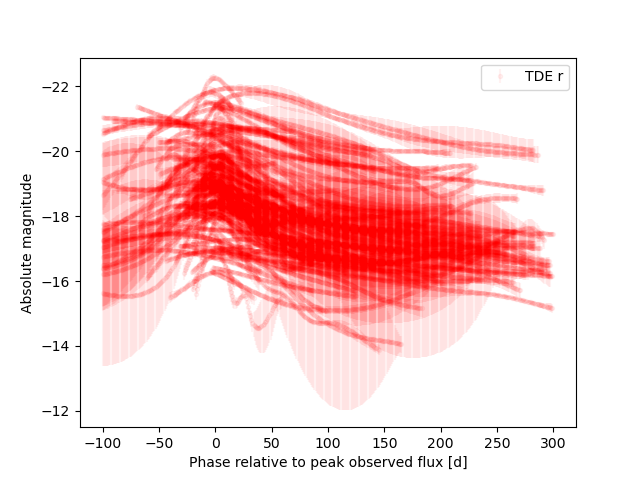

In [277]:
# Test extrabol LCs - cosmological k-correction
plt.figure()
time=df_all.Phase
r=df_all['LSST/LSST.r']
rerr=df_all['LSST/LSST.r_err']
plt.errorbar(time,r,yerr=rerr,marker=".",linestyle="",color='red',alpha=.05,label=
            'TDE r')

time2=df_2n.Phase
r2=df_2n['LSST/LSST.r']
rerr2=df_2n['LSST/LSST.r_err']
#plt.errorbar(time2,r2,yerr=rerr2,marker=".",linestyle="",color='black',alpha=.05,label=
 #           'SN IIn r')
plt.xlabel('Phase relative to peak observed flux [d]')
plt.ylabel('Absolute magnitude')
plt.legend()
#plt.xlim(-100,300)
plt.gca().invert_yaxis()
plt.savefig('TDE_SNIIn_comb.pdf')
plt.show()

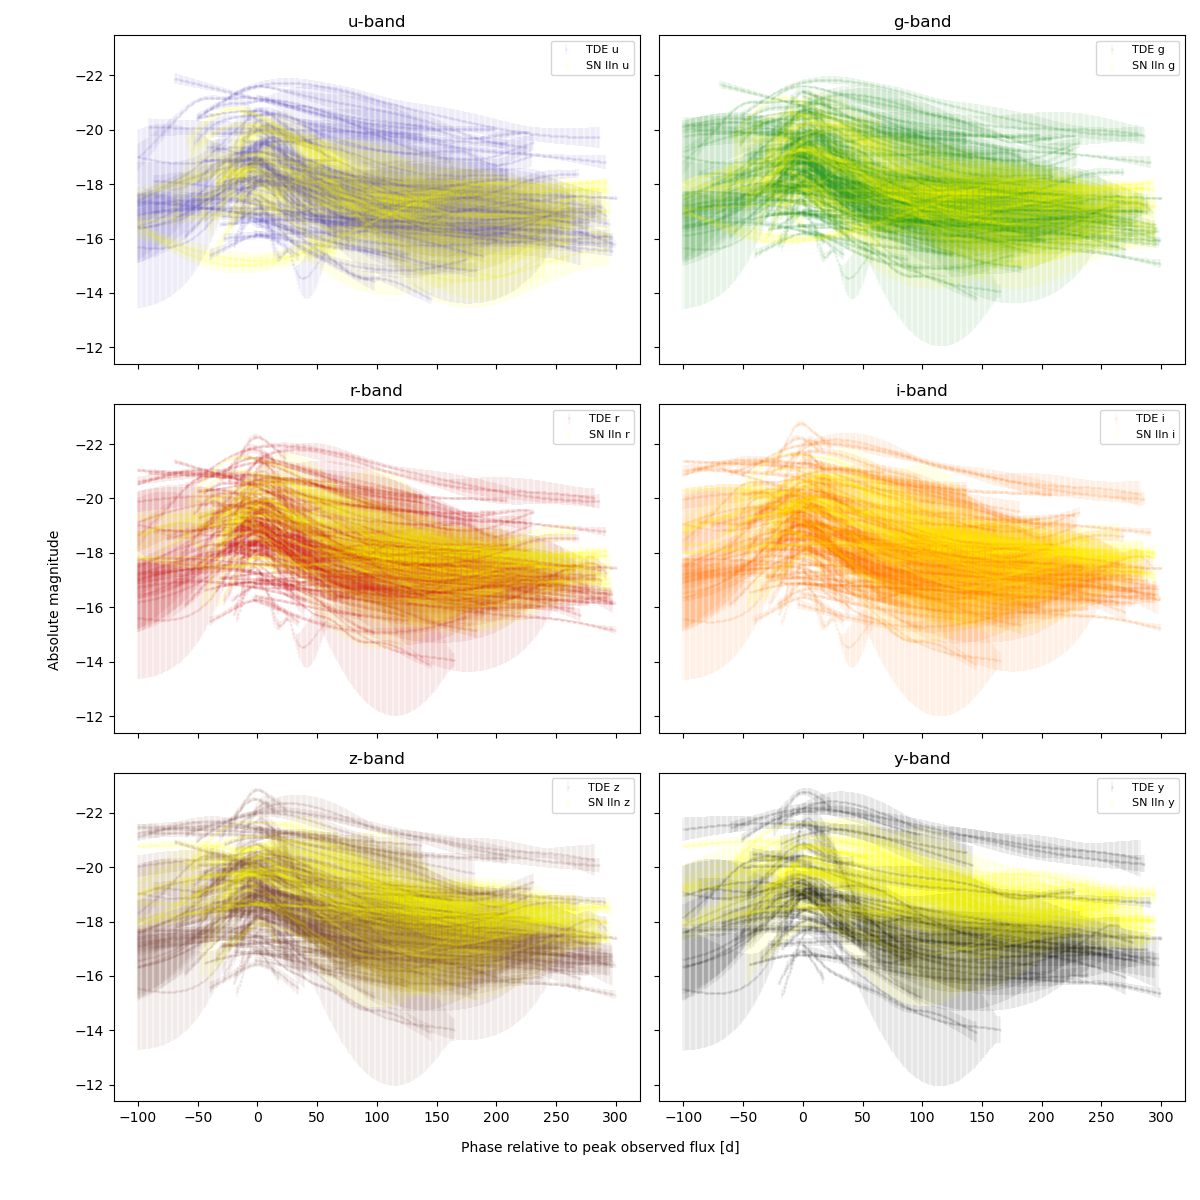

In [278]:
import matplotlib.pyplot as plt

filters = ['u', 'g', 'r', 'i', 'z', 'y']
colors = {'u': '#6A5ACD', 'g': '#2ca02c', 'r': '#d62728', 'i': '#ff7f0e', 'z': '#8c564b', 'y': '#1b1b1b'}


fig, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=True, sharey=True)
axes = axes.flatten()
ms=2.5
for ax, f in zip(axes, filters):
    # --- TDE ---
    time = df_all.Phase
    mag = df_all[f'LSST/LSST.{f}']
    magerr = df_all[f'LSST/LSST.{f}_err']

    ax.errorbar(
        time, mag, yerr=magerr,
        marker='.',ms=ms, linestyle='',
        color=colors[f], alpha=0.05,
        label=f'TDE {f}'
    )

    # --- SN IIn ---
    time2 = df_2n.Phase
    mag2 = df_2n[f'LSST/LSST.{f}']
    magerr2 = df_2n[f'LSST/LSST.{f}_err']

    ax.errorbar(
        time2, mag2, yerr=magerr2,
        marker='.',ms=ms, linestyle='',
        color='yellow', alpha=0.05,
        label=f'SN IIn {f}'
    )

    ax.set_title(f'{f}-band')
    #ax.invert_yaxis()
    ax.legend(fontsize=8)

axes[0].invert_yaxis()
# Shared labels
fig.text(0.5, 0.04, 'Phase relative to peak observed flux [d]', ha='center')
fig.text(0.04, 0.5, 'Absolute magnitude', va='center', rotation='vertical')

plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.savefig('TDE_SNIIn_comb_ugrizy.pdf')
plt.show()
